In [44]:
''' 
NCAR/UCAR training material
Questions? Contact: A. Kootz akootz@ucar.edu
https://www.youtube.com/watch?v=kstc-6uz7AQ (vidoe of tutorial)
'''

'''
In this tutorial we will make an image using prime numbers to create colors.
Colors are usually represented in 24 bits. 8 bits each of red, green, and blue. 
If we can find primes of less than 24 bits in length, and we can use them to make colors. 
Then based on the number of primes we find, we will factor that number to find a shape for our image.
Once we have the list of primes, and the shape of the image, we can produce and view it. 
'''
pass #we will use pass to make end_of_scope explicit.

In [45]:
import math as m #math is python's builtin math package
import numpy as np #this is what we are learning about today
import matplotlib.pyplot as plt #will be covered in a later tutorial
import time #time is python's builtin timing package
# last import not part of tutorial prep for NCAR
from PIL import Image #from the conda package pillow, it is optional, but reccomended.

In [48]:
#
print(-int(1))
print(np.linspace(1,5,10,dtype=int))
print(np.linspace(1,5,10,dtype=int)[3:])


-1
[1 1 1 2 2 3 3 4 4 5]
[2 2 3 3 4 4 5]


In [49]:
number = 2
print(numbers)
x=range(2*number, 10+1, number)
print(x)
for ex in x:
    print('ex:', ex)

[1 1 1 2 2 3 3 4 4 5]
range(4, 11, 2)
ex: 4
ex: 6
ex: 8
ex: 10


In [58]:
# prime sieve function https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes
def prime_sieve(max_number): #this is a function definition
  offset = -int(1) #offset of numbers index from 0
  numbers = np.linspace(1,max_number,max_number,dtype=int) #numpy array of ints from 1 -> max_number
  # print('numbers 1:', numbers)
  for number in numbers[1:]: #list comprehension on numpy arrays using slice to skip first element
    # print('--number:', number)
    if not number == 0: #could also be |if number !=0:|
      # print('----range(2*number, max_number+1, number):', range(2*number, max_number+1, number))
      for hole in range(2*number, max_number+1, number): #indexes of multiples of the current prime number
        # print('------hole+offset:', hole+offset)
        # print('------numbers[hole+offset] before:', numbers[hole+offset])
        numbers[hole+offset] = 0 #set all multiples of the current prime number to zero
        # print('------numbers[hole+offset] after:', numbers[hole+offset])
      pass #exit scope of for loop
    pass #exit scope of if conditional
  pass #exit scope of for loop
  # print('numbers 2:', numbers)
  # print('numbers 3:',numbers[numbers>0])
  return numbers[numbers>0] #indexing via boolean condition, returning compact numpy array
pass #exit function scope

In [59]:
me = prime_sieve(10)
print('me:', me)

me: [1 2 3 5 7]


5.218836200016085


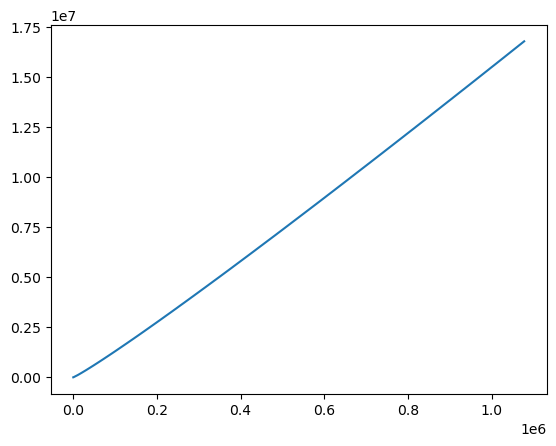

In [60]:
start = time.perf_counter() #store floating-point seconds from clock with highest available resolution
primes = prime_sieve(2**24) #store output from function call
end = time.perf_counter() #store floating-point seconds from clock with highest available resolution
print(end-start) #show elapsed time

plt.plot(primes) #quick visual check of data
plt.show() #quick visual check of data

In [61]:
print('how many:', len(primes))

how many: 1077872


In [62]:
# integer factorization function https://en.wikipedia.org/wiki/Trial_division
def factors(number): #this is a function definition 
  limit = int(m.sqrt(number)) #each pair of factors will have one factor less than the square root of the number
  factor_list = [] #this data structure will change size frequently, so python List is a better choice than numpy Array
  for f1 in range(2, limit, 1): #the smaller factor will be between 2 and limit 
    if m.remainder(number, f1) == 0: #condition based on trial division result
      f2 = int(number/f1) #calculate the larger of the factor
      factor_list.append([f1,f2]) #add the pair of factors to the list
    pass #exit scope of if conditional
  pass #exit scope of for loop
  return np.asarray(factor_list) #create numpy array from factor list, and return the numpy array
pass #exit function scope

In [63]:
factor_list = factors(len(primes)) #store output from function call
print(f'list of possible image resolutions\n {factor_list}\n') #print the list of factors
print(f'most square image resolution\n{factor_list[-1]}\n') #negative indexing to pull last element of numpy array (also works on lists)(sometimes called reverse indexing)
print(f'image ratio: {factor_list[-1][-1]/factor_list[-1][-2]}') #nested negative idexing | factor_list[-1][-2]) === factor_list[-1][0]) |
print(f'golden ratio: {(1+m.sqrt(5))/2}') #algebraic form of the continued fraction

list of possible image resolutions
 [[     2 538936]
 [     4 269468]
 [     8 134734]
 [    16  67367]
 [    23  46864]
 [    29  37168]
 [    46  23432]
 [    58  18584]
 [    92  11716]
 [   101  10672]
 [   116   9292]
 [   184   5858]
 [   202   5336]
 [   232   4646]
 [   368   2929]
 [   404   2668]
 [   464   2323]
 [   667   1616]
 [   808   1334]]

most square image resolution
[ 808 1334]

image ratio: 1.650990099009901
golden ratio: 1.618033988749895


In [64]:
# Array reshaping
height = factor_list[-1][0] #mixing negative and positive indexing
width = factor_list[-1][1] #note that negative indexing is 1 indexed, while positive indexing is 0 indexed
primes_shape = primes.reshape((height,width)) #store a reshaped copy of the primes array
print(f'shape of primes {primes.shape}') #you'll notice that calling the reshape method on the primes object did not reshape the primes object.
print(f'shape of primes_shape {primes_shape.shape}') #you'll notice that 'shape' no longer feels like a real word

shape of primes (1077872,)
shape of primes_shape (808, 1334)


In [65]:
# numpy array to image function
def image_from_array(array): #this is a function definition 
  img = array.tolist() #after trying it both ways, modifing a list was faster than replacing elements in a pre-allocated numpy array
  for y in range(height): #outer loop from top to bottom of image
    for x in range(width): #inner loop from left to right of image
      argb = img[y][x] #extract the prime
      r = ((argb//(256*256))%256)/256 #red channel | floor division, multiplication, remainder, floating-point division
      g = ((argb//256)%256)/256 #green channel
      b = ((argb)%256)/256 #blue channel
      img[y][x] = [r,g,b] #replace prime with rgb list
    pass #exit scope of inner loop
  pass #exit scope of outer loop
  return np.array(img) #return image as numpy array
pass #exit function scope



1.1945857999962755


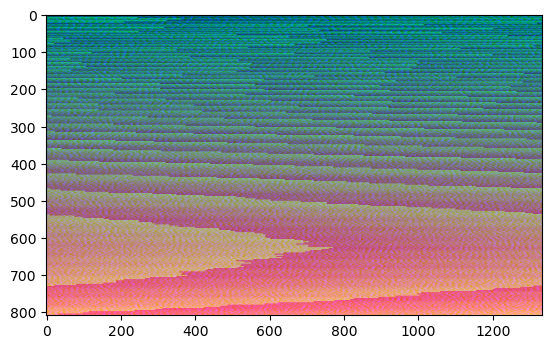

In [66]:
start = time.perf_counter() #store floating-point seconds from clock with highest available resolution
image1 = image_from_array(primes_shape) #store output from function call
end = time.perf_counter() #store floating-point seconds from clock with highest available resolution
print(end-start) #show elapsed time

plt.imshow(image1) #preview image

In [ ]:
# make an image we can save
image2 = np.array(image1*256,dtype=np.uint8) #setup the numpy array in the format that PIL uses.
image3 = Image.fromarray(image2) #create the PIL Image
image3.show() #show the PIL image
#image3.save("primes.png", compress_level=9) #save the image to the user's directory.
